In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math
import pandas as pd
from astropy.table import Table

In [2]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

k = 0.0001
#
  # 1/Mpc
#
# Cosmological parameters and other CLASS parameters
#
common_settings = {# we need to set the output field to something although
                   # the really releveant outpout here will be set with 'k_output_values'
                   'output':'tCl,pCl,lCl,mPk,mTk',
                   # value of k we want to polot in [1/Mpc]
                   'k_output_values': k,
                   # LambdaCDM parameters
                   'Omega_Lambda':0, 
                   'Omega_fld':0,
                   'Omega_smg' : -1,
                   'gravity_model' :'propto_omega',
                   # k, b, m, t
                   #'parameters_smg' :'1., 0., 0., 0., 1.',
                   #'parameters_smg' :'1., 0.625, 0., 0., 1.',
                   #'parameters_smg' :'1., 1.25, 0., 0., 1.',
                   'parameters_smg' :'1., 0., 0.625, 0., 1.',
                   #'parameters_smg' :'1., 0., 1.25, 0., 1.',
                   'expansion_model' :'lcdm',
                   'expansion_smg' : 0.5,
                   'output_background_smg' :10,
                   'skip_stability_tests_smg' : 'no',
                   'cs2_safe_smg' : 0.,
                   'D_safe_smg' : 0.,
                   'ct2_safe_smg' :0.,
                   'M2_safe_smg' : 0.,
                   'a_min_stability_test_smg' : 0.0001,
    
    
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'hubble_evolution' : 'y',
                   'hubble_friction' :3.,
                   'pert_initial_conditions_smg' : 'ext_field_attr',
                   
                   # other options and settings
                   'pert_ic_ini_z_ref_smg' : 1e10,    
                   'pert_ic_tolerance_smg' : 2e-2, 
                   'pert_ic_regulator_smg' : 1e-15,
                   'pert_qs_ic_tolerance_test_smg' : 10,
                   'method_qs_smg' : 'fully_dynamic',
                   'z_fd_qs_smg' : 10.,
                   'trigger_mass_qs_smg' : 1.e3,
                   'trigger_rad_qs_smg' : 1.e3, 
                   'eps_s_qs_smg' : 0.01,
                   'n_min_qs_smg' : 1e2,
                   'n_max_qs_smg' : 1e4,
                   'start_small_k_at_tau_c_over_tau_h' : 1e-4,
                   'start_large_k_at_tau_h_over_tau_k' : 1e-4,
                   'perturb_sampling_stepsize' : 0.05,
                   'l_logstep' : 1.045,
                   'l_linstep' : 50,
                   'gauge':'synchronous'}  

In [3]:
# call CLASS
#
M = Class()
M.set(common_settings)
M.compute()

In [4]:
back = M.get_background() #keys disponiveis do background
print(back.keys())

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_ur', '(.)rho_crit', 'gr.fac. D', 'gr.fac. f', '(.)rho_smg', '(.)p_smg', 'M*^2_smg', 'D_M*^2_smg', 'kineticity_smg', 'braiding_smg', 'tensor_excess_smg', 'Mpl_running_smg', 'c_s^2', 'kin (D)', 'kineticity_prime_smg', 'braiding_prime_smg', 'lambda_1', 'lambda_2', 'lambda_3', 'lambda_4', 'lambda_5', 'lambda_6', 'lambda_7', 'lambda_8', 'lambda_9', 'lambda_10', 'lambda_11', 'lambda_2_p', 'lambda_8_p', 'lambda_9_p', 'lambda_11_p', 'cs2num', 'cs2num_p', 'H_prime', 'H_prime_prime', 'rho_m'])


In [5]:
#df = pd.DataFrame(back, columns = ['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_ur', '(.)rho_crit', 'gr.fac. D', 'gr.fac. f', '(.)rho_smg', '(.)p_smg', 'M*^2_smg', 'D_M*^2_smg', 'kineticity_smg', 'braiding_smg', 'tensor_excess_smg', 'Mpl_running_smg', 'c_s^2', 'kin (D)', 'kineticity_prime_smg', 'braiding_prime_smg', 'lambda_1', 'lambda_2', 'lambda_3', 'lambda_4', 'lambda_5', 'lambda_6', 'lambda_7', 'lambda_8', 'lambda_9', 'lambda_10', 'lambda_11', 'lambda_2_p', 'lambda_8_p', 'lambda_9_p', 'lambda_11_p', 'cs2num', 'cs2num_p', 'H_prime', 'H_prime_prime', 'rho_m'])

#print(df)

In [6]:
alphaB = back['braiding_smg']
alphaT = back['tensor_excess_smg']
alphaM = back['Mpl_running_smg']
rho_m = back['rho_m']
H = back['H [1/Mpc]']
H_prime = back['H_prime']
H_prime_prime = back['H_prime_prime']
alphaB_prime = back['braiding_prime_smg']
rho_g = back['(.)rho_g']
rho_ur = back['(.)rho_ur']
M2 = back['M*^2_smg']
a = 1/(1 + back['z'])

In [7]:
Omega_m = np.zeros(len(H))
qsi = np.zeros(len(H))
qsi_p = np.zeros(len(H))

for i in range(len(H)):
    Omega_m[i] = rho_m[i] / (3.*H[i]*H[i])
    qsi[i] = H_prime[i] / (a[i]*H[i]*H[i])
    qsi_p[i] = H_prime_prime[i] / (a[i]*H[i]*a[i]*H[i]) - (H_prime[i]*H_prime[i]) / (H[i]*H[i]*a[i]*a[i]*H[i]) - H_prime[i]/(a[i]*H[i])

In [8]:
Omega_g = np.zeros(len(H))
Omega_ur = np.zeros(len(H))
w_matter = np.zeros(len(H))

for i in range(len(H)):
    Omega_g[i] = rho_g[i] / (3.*H[i]*H[i])
    Omega_ur[i] = rho_ur[i] / (3.*H[i]*H[i])
    w_matter[i] = (Omega_g[i]/3. + Omega_ur[i]/3.) / Omega_m[i]

In [9]:
Omegam_tildo = np.zeros(len(H))
alpha1 = np.zeros(len(H))
alpha2 = np.zeros(len(H))
mu2 = np.zeros(len(H))

for i in range(len(H)):
    Omegam_tildo[i] = rho_m[i] / (3.0*H[i]*H[i]*M2[i])
    alpha1[i] = alphaB[i] + alphaT[i]*(alphaB[i] - 2.0) + 2.0*alphaM[i]
    alpha2[i] = alphaB[i]*qsi[i] + alphaB_prime[i]/(a[i]*H[i]) -2.0*qsi[i] -3.0*(1.0 + w_matter[i])*Omegam_tildo[i]
    mu2[i] = -3.0*alphaB[i]*(2.0*qsi[i]*qsi[i] + qsi_p[i] +qsi[i]*(3.0 + alphaM[i])) - 3.0*qsi[i]*alpha2[i]

In [10]:
h1 = np.zeros(len(H))
h3 = np.zeros(len(H))
h5 = np.zeros(len(H))

for i in range(len(H)):
    h1[i] = (alphaT[i] + 1.0)/M2[i]
    h3[i] = (alpha1[i]*(2.0 - alphaB[i]) + 2.0*alpha2[i])/(2.0*H[i]*H[i]*mu2[i])
    h5[i] = (alpha1[i]*(alphaM[i] + 1.0)/(alphaT[i] + 1.0) + alpha2[i])/(H[i]*H[i]*mu2[i])

In [11]:
Geff = np.zeros(len(H))

for i in range(len(H)):
    Geff[i] = h1[i]*(1.0 +k*k*h5[i])/(1.0 +k*k*h3[i])
    
Geff

array([1.        , 1.        , 1.        , ..., 0.83084063, 0.83007086,
       0.82937373])

In [12]:
all_k = M.get_perturbations() #Geff_smg(a) para k fixo
print(all_k['scalar'][0].keys())

perturb = all_k['scalar'][0]
perturb['Geff_smg']

dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm', 'V_x_smg', 'V_x_prime_smg', 'h_prime', 'eta', 'Geff_smg'])


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [13]:
a = perturb['a']

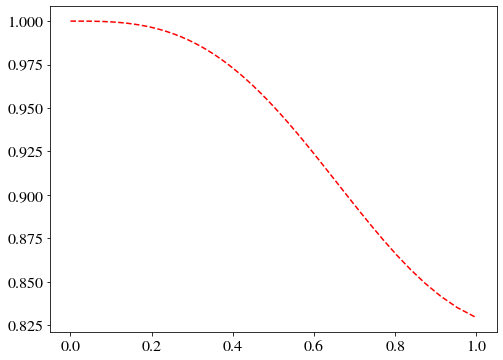

In [14]:
plt.plot(perturb['a'], perturb['Geff_smg'], 'r--')
plt.show()

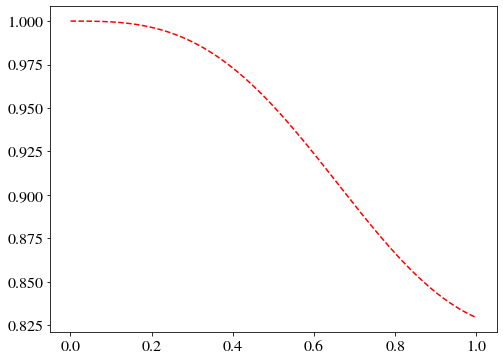

In [15]:
plt.plot(1/(1+back['z']), Geff, 'r--')
plt.show()